In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from lightkurve.search import search_lightcurve

from astropy.table import Table

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [6]:
lks = search_lightcurve('GJ 1243', exptime=120, author='SPOC')
lks

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,273589987,0.0
1,TESS Sector 15,2019,SPOC,120,273589987,0.0
2,TESS Sector 41,2021,SPOC,120,273589987,0.0
3,TESS Sector 54,2022,SPOC,120,273589987,0.0
4,TESS Sector 55,2022,SPOC,120,273589987,0.0
5,TESS Sector 74,2024,SPOC,120,273589987,0.0
6,TESS Sector 75,2024,SPOC,120,273589987,0.0


In [7]:
lc = lks.download_all()

In [8]:
len(lc)

7

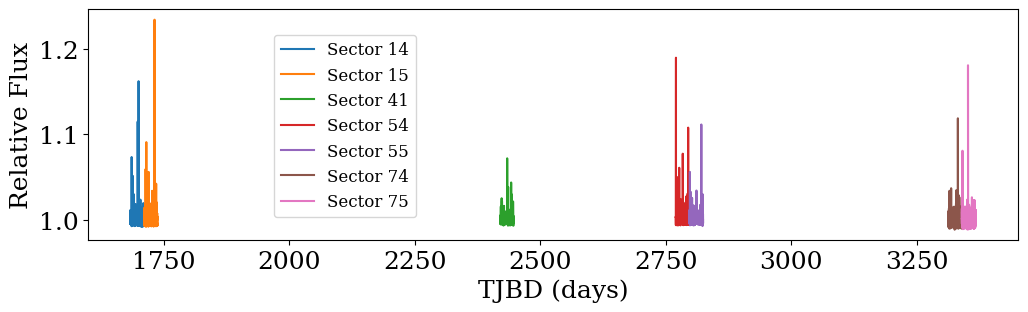

In [28]:
plt.figure(figsize=(12,3))
for k in range(len(lc)):
    plt.plot(lc[k].time.value, lc[k].flux.value / np.nanmedian(lc[k].flux.value), label='Sector '+str(lc[k].Sector))
plt.xlabel('TJBD (days)')
plt.ylabel('Relative Flux')
plt.legend(fontsize=12, loc=(.2,.1))
plt.savefig('tess_lc.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [39]:
# final period used in GJ 1243 - Kepler starspot paper
per_orig = 0.5925961953623503
per_new = 0.5925974180105166

BJD0 = 2454833. # Kepler time zeropoint
TJD0 = 2457000. # TESS time zeropoint

EPHEM = 0.11497024 # used to phase superwasp

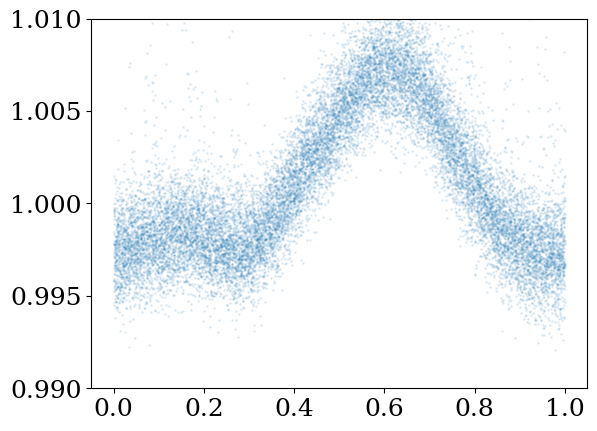

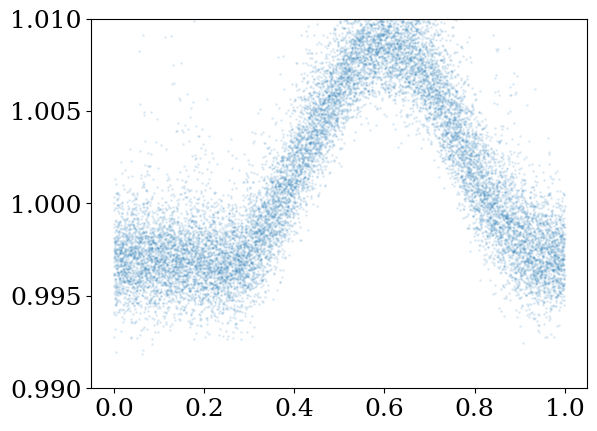

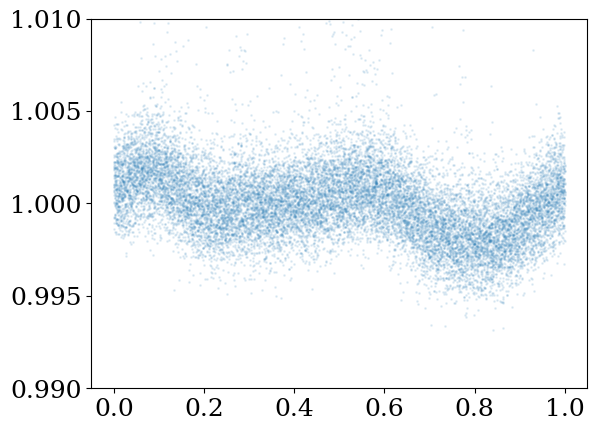

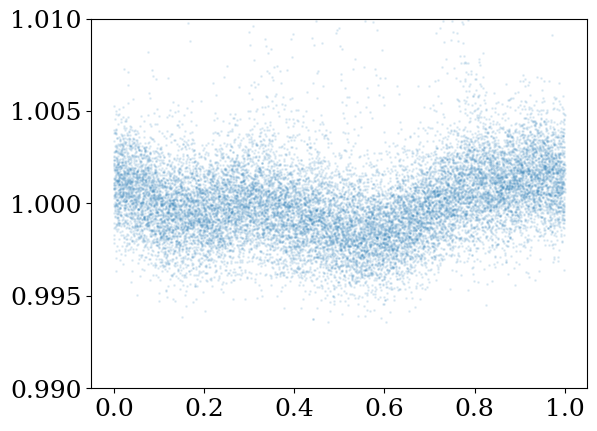

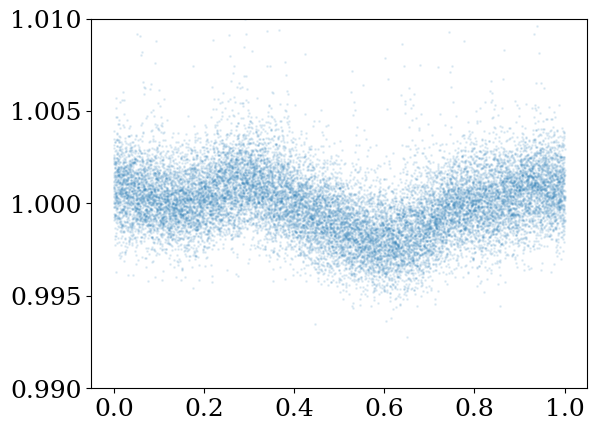

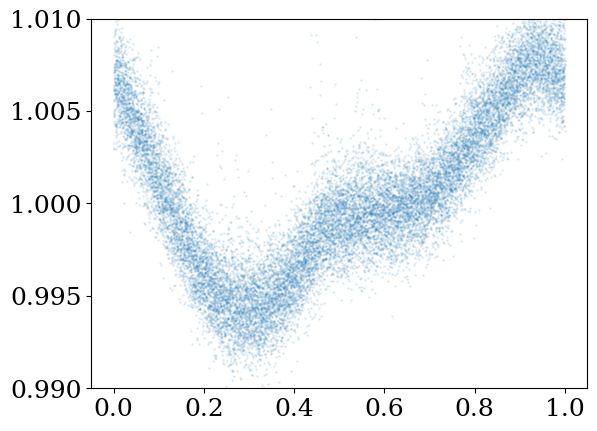

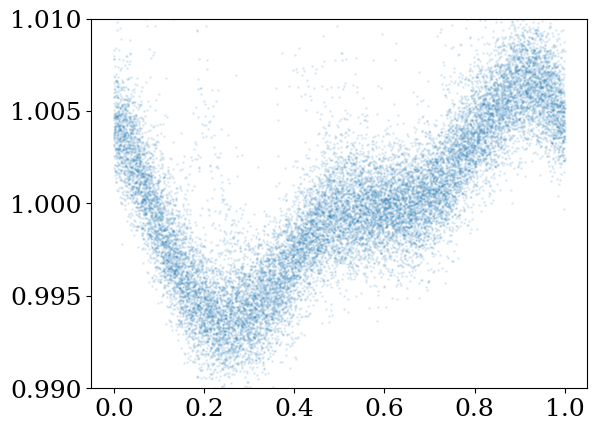

In [41]:

for k in range(len(lc)):
    plt.figure()
    plt.scatter((((lc[k].time.value) + TJD0 - BJD0 - EPHEM) % per_orig) / per_orig, lc[k].flux.value / np.nanmedian(lc[k].flux.value), 
                label='Sector '+str(lc[k].Sector), s=1, alpha=0.1)
    plt.ylim(0.99,1.01)
    
# plt.xlabel('TJBD (days)')
# plt.ylabel('Relative Flux')
# plt.legend(fontsize=12, loc=(.2,.1))
# plt.savefig('tess_lc.png', dpi=150, bbox_inches='tight', pad_inches=0.25)